In [ ]:
# не успеваем
# метод ближайших соседей
#онлайн дообучение - когда данныне не влезают в память, и модель дообучается




обучение с учителем - это когда есть таргет (классификация и регрессия)
обучение без учителя - нет таргета (кластеризация)
обучение с подкреплением - есть начальный набор, на котором есть обучения, но потом цель обучения модифицируется, 
и происходит дальнейшее обучение (типа робот, который едет по комнате и обходит препятствия)



2 из 10 или 20 из 100 ?


плюс кластеризации - располагаем большим объемом данных
минус - нет четких метрик для валидации


доверительный интервал - ? 
отобрали 95 писем, можно ли распределить на генеральную совокупность

In [ ]:
применимость - например спам-письма.
кластеризация позволяет лучше понять данные, с которыми мы имеем дело.

разметка - это соответствие тагрета строке.
разметка бывает шумной (то есть спам идентифицировали например как не спам)
тут кластеризация помогает идентифицировать и даже исправить то , что было сделано неправильно.
то есть мы увидим , что в области спама есть например письма указаны как не спам


то есть применимость:
    1. создать разметку
    2. провалидировать существующую разметку
    

DBSCAN - самый лучший алгоритм , но сложно его настроить правильно
Агломеративная Кластеризация - вторая в рейтинге

    

### k-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

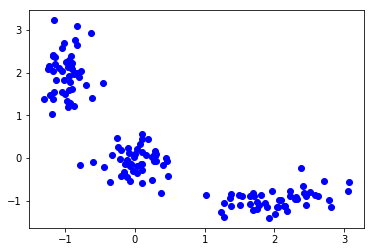

In [6]:
X = np.zeros((150, 2))

np.random.seed(seed=42)

X[:50, 1] = np.random.normal(loc = 0.0, scale = 0.3, size = 50)
X[:50, 0] = np.random.normal(loc = 0.0, scale = 0.3, size = 50)

X[50:100, 1] = np.random.normal(loc = 2.0, scale = 0.5, size = 50)
X[50:100, 0] = np.random.normal(loc = -1.0, scale = 0.2, size = 50)

X[100:150, 1] = np.random.normal(loc = -1.0, scale = 0.2, size = 50)
X[100:150, 0] = np.random.normal(loc = 2.0, scale = 0.5, size = 50)


plt.plot(X[:, 0], X[:, 1], 'bo')
plt.plot(cent)

In [7]:
from scipy.spatial.distance import cdist


In [23]:
#np.random.seed(seed=42)
centroids = np.random.normal(loc = 0.0, scale = 1, size = 6)
np.reshape(centroids, (3,2))

array([[ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975]])

In [24]:
centroids = centroids.reshape(3, 2)

In [25]:
centroids

array([[ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975]])

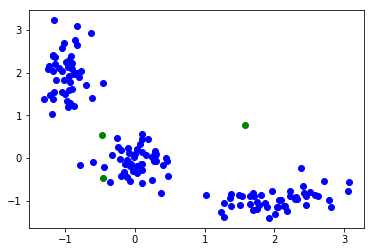

In [26]:
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.plot(centroids[:, 0], centroids[:, 1], 'bo', color='green' )
plt.show()

In [27]:
distanses = cdist(X, centroids)
labels = distanses.argmin(axis=1) # индекс минимальной 

In [28]:
labels

array([1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
k=4
centroids = np.random.normal(loc = 0.0, scale = 1, size = k*2)
centroids = centroids.reshape((k, 2))
cent_history = []
cent_history.append(centroids)


for i in range(3):
    distanses = cdist(X, centroids)
    labels = distanses.argmin(axis=1)
    
    centroids = centroids.copy()
    for j in range(k):
        centroids[j] = np.mean(X[labels==j, :], axis = 0)
        
    cent_history.append(centroids)    

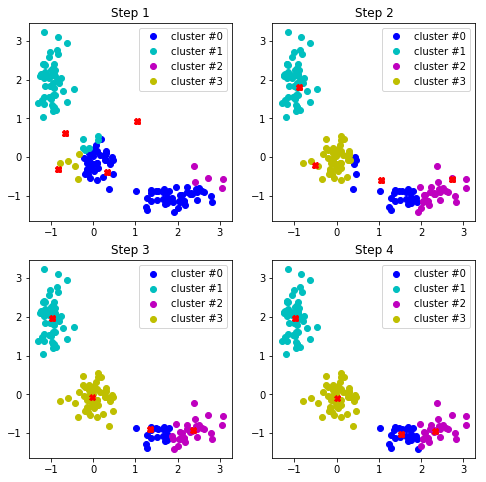

In [45]:
colors  = ['b', 'c', 'm', 'y' , 'g']
plt.figure(figsize=(8, 8))

for i in range(4):
    distanses = cdist(X, cent_history[i])
    labels = distanses.argmin(axis = 1)
    
    plt.subplot(2, 2, i + 1)
    for j in range(k):
        plt.plot(X[labels == j, 0], X[labels == j, 1], colors[j] + 'o', label = 'cluster #{}'.format(j))
        plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
        plt.legend(loc=0)
        plt.title('Step {:}'.format(i + 1))
    

Text(0,0.5,'$J(C_k)$')

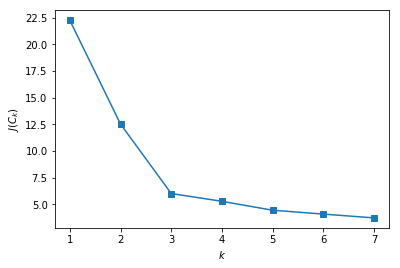

In [47]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')



In [ ]:
Метрики качества

- инерция

- силуэт 



In [ ]:
выбираем 3 кластера, так как после значения 3 функция меняет свое поведение.


In [49]:
from sklearn import metrics

Text(0,0.5,'$silhouete)$')

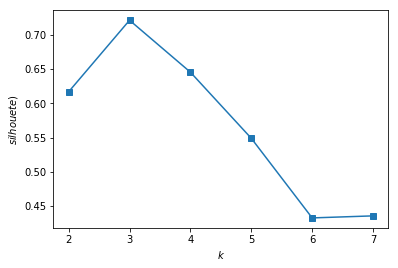

In [51]:
silhouete = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    silhouete.append(metrics.silhouette_score(X, kmeans.labels_))
   
    
plt.plot(range(2, 8), silhouete, marker='s')
plt.xlabel('$k$')
plt.ylabel('$silhouete)$')